In [1]:
import torch
import matplotlib.pyplot as plt
from pyro.distributions import Dirichlet

In [2]:
samples = torch.tensor([[0.3155, 0.3514, 0.3331],
        [0.3681, 0.3237, 0.3082],
        [0.3209, 0.3358, 0.3433],
        [0.3852, 0.3184, 0.2964],
        [0.3655, 0.3060, 0.3284],
        [0.3369, 0.3345, 0.3286],
        [0.3410, 0.3187, 0.3403],
        [0.3817, 0.3168, 0.3016],
        [0.3201, 0.3446, 0.3353],
        [0.3621, 0.3266, 0.3112]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
AREA = 0.5 * 1 * 0.75**0.5
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

In [4]:
# For each corner of the triangle, the pair of other corners
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# The area of the triangle formed by point xy and another pair or points
tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))

def xy2bc(xy, tol=1.e-4):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    coords = np.array([tri_area(xy, p) for p in pairs]) / AREA
    return np.clip(coords, tol, 1.0 - tol)


In [5]:
# Adapted from https://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
def triplot(samples, concentration, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)

    points = torch.tensor(np.array([(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]))
    points /= torch.sum(points, dim=1, keepdim=True)

    alpha = samples * concentration
    vals = [float(sum(torch.exp(Dirichlet(alpha).log_prob(points[i,:])))) for i in range(points.shape[0])]
    plt.tricontourf(trimesh, vals, nlevels, cmap='jet', **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

In [9]:
samples = Dirichlet(torch.ones(3) * 2).sample((10,))

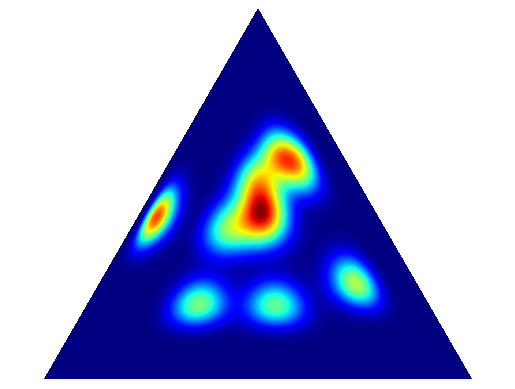

In [10]:
triplot(samples, 100)

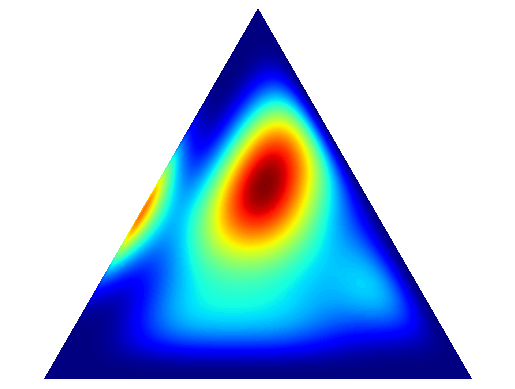

In [16]:
triplot(samples, 20)